># <center>LAB 4 - Program to get Synonyms from WordNet <br> Lab 5 - Program to get Antonyms from WordNet

---------------------------

Name: **KRISH GOYAL** <br>
Reg No: **21112015** <br>
Class: **5 BSC DS** <br>

data: 97
analytics: 56
google: 50
databases: 46
web: 36
nosql: 36
performance: 17
database: 15
relational: 13
may: 12


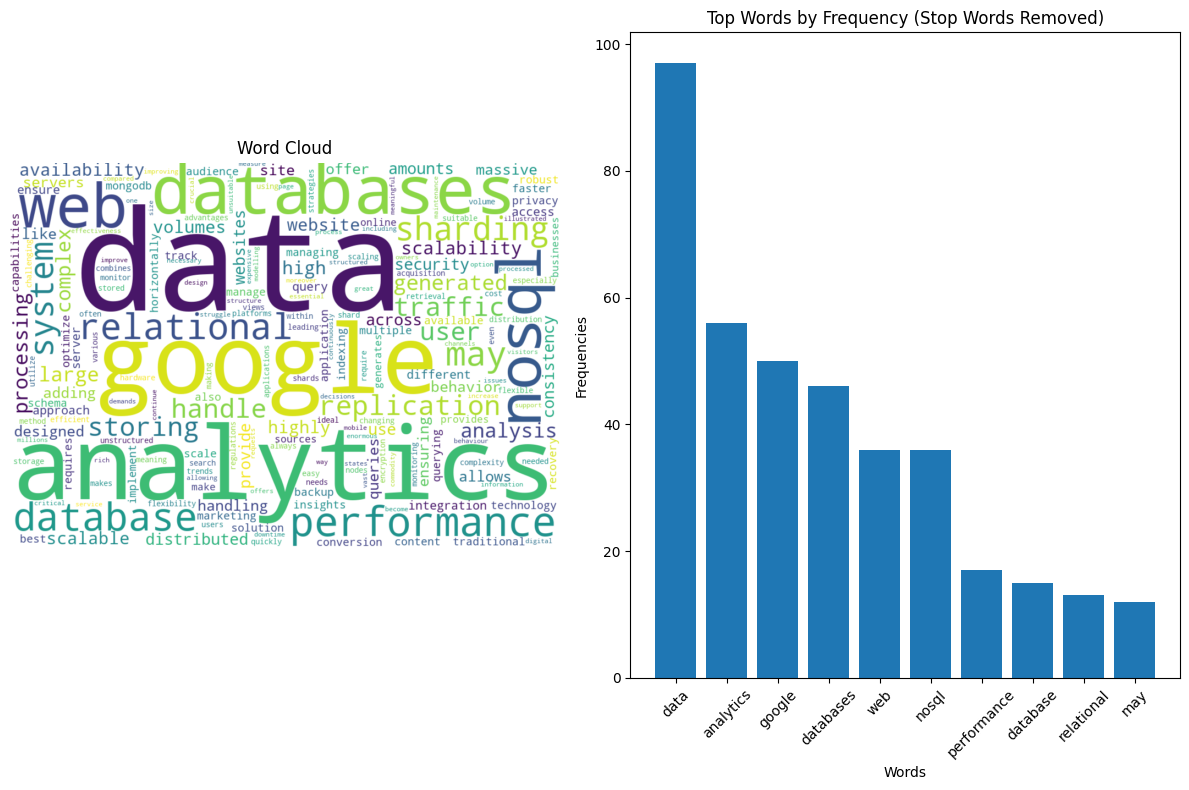

In [6]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import nltk

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# Load the English stopwords
english_stopwords = set(stopwords.words('english'))

# Read text from a TXT file (replace 'your_file.txt' with the path to your file)
with open('document.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize the text
words = word_tokenize(text, language='english')

# Remove stopwords and non-alphabetic words
words = [word.lower() for word in words if word.isalpha() and word.lower() not in english_stopwords]


# Calculate word frequencies
word_freq = Counter(words)

# Print the most common words and their frequencies
most_common = word_freq.most_common(10)  # Change the number to get more or fewer words
for word, freq in most_common:
    print(f'{word}: {freq}')

# Create a word cloud
wordcloud = WordCloud(width=1000, height=700, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud and the bar chart
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')

plt.subplot(1, 2, 2)
top_words, top_frequencies = zip(*most_common)
plt.bar(top_words, top_frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top Words by Frequency (Stop Words Removed)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

- **Observation** - *The above code follows the follwing approach:* <br>
1.Importing the File as txt file and reading it <br>
2.Importing the NLTK Library to remove stop words from the text <br>
3.Applied POS Tagging and then counter is used to calculate the frequency of words in the text<br>
4.Also exlored the approach to make a bar graph of removed Stopwords <br>
5.Then the Word Cloud shows the words appearance from the text<br>

>## COMPARISION BETWEEN USING WORDNET & WORDNET LEMMATIZER

>### Write a program to get synonyms from WordNet

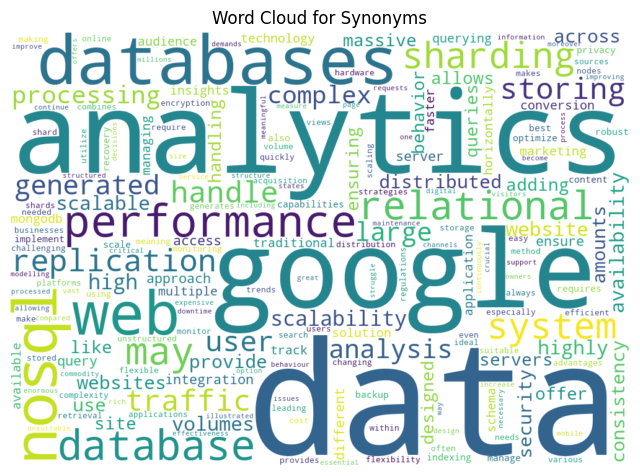

In [7]:
from nltk.corpus import wordnet
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# Function to get synonyms for a word using WordNet
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))  # Remove duplicates and return as a list

# Create a dictionary to store words and their synonyms
word_synonyms_dict = {}

# Generate synonyms for each word and add them to the dictionary
for word in words:
    synonyms = get_synonyms(word)
    if synonyms:
        word_synonyms_dict[word] = synonyms

# Count the number of synonyms for each word
word_synonyms_count = {word: len(synonyms) for word, synonyms in word_synonyms_dict.items()}

# Generate a word cloud for word frequencies
word_freq = Counter(words)
wordcloud = WordCloud(width=1000, height=700, background_color='white')
wordcloud.generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Synonyms')
plt.show()

- **Observation** - *The above code follows the follwing approach:* <br>
1. Using the Above imported file text Applying wordnet technique to get the synonyms.<br>
2. Declared the synonyms function and imported it with nltk and took lemma of each word<br>
3. Defines a function for synonym retrieval from WordNet.<br>
4. Creates a dictionary to store word synonyms.<br>
5. Counts synonyms for each word and stores the count.<br>
6. Generates a word cloud based on word frequencies using the WordCloud library for the synonyms.<br>

>### Write a program to get synonyms from WordNetLemmatizer

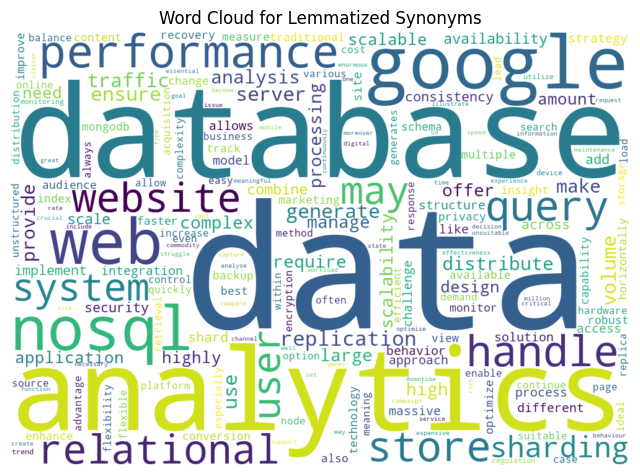

In [8]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk.download('averaged_perceptron_tagger')

# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()
# Function to lemmatize a word using WordNetLemmatizer
def lemmatize_word(word):
    # Define a mapping of POS tags for WordNetLemmatizer (use WordNet POS constants)
    pos_mapping = {
        'n': wordnet.NOUN,
        'v': wordnet.VERB,
        'a': wordnet.ADJ,
        'r': wordnet.ADV
    }
    
    # Tokenize the word to identify its POS tag
    pos_tag = nltk.pos_tag([word])[0][1][0].lower()
    
    # Lemmatize the word using the appropriate POS tag
    lemma = lemmatizer.lemmatize(word, pos=pos_mapping.get(pos_tag, wordnet.NOUN))
    
    return lemma

# Lemmatize the words
lemmatized_words = [lemmatize_word(word) for word in words]

# Function to get synonyms for a word using WordNet
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return list(set(synonyms))  # Remove duplicates and return as a list

# Create a dictionary to store words and their synonyms
word_synonyms_dict = {}

# Generate synonyms for each word (lemmatized form) and add them to the dictionary
for word in lemmatized_words:
    synonyms = get_synonyms(word)
    if synonyms:
        word_synonyms_dict[word] = synonyms

# Count the number of synonyms for each word
word_synonyms_count = {word: len(synonyms) for word, synonyms in word_synonyms_dict.items()}

# Generate a word cloud for word frequencies
word_freq = Counter(lemmatized_words)
wordcloud = WordCloud(width=1000, height=700, background_color='white')
wordcloud.generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Lemmatized Synonyms')
plt.show()


- **Observation** - *The above code follows the follwing approach:* <br>

1. Applied the same technique of getting synonyms but with different approach.<br>
2. Creating a WordNetLemmatizer Object for a WordNetLemmatizer object named lemmatizer is created to perform lemmatization.<br>
3. The code defines a function lemmatize_word(word) to lemmatize a word using WordNetLemmatizer.<br>
4. It maps POS tags to WordNet's POS constants and tokenizes each word to identify its POS tag.<br>
5. Then, it lemmatizes the word using the appropriate POS tag and returns the lemma.<br>
6. The list lemmatized_words is created by lemmatizing each word in the original list of words.<br>

>### Write a program to get Antonyms from WordNet

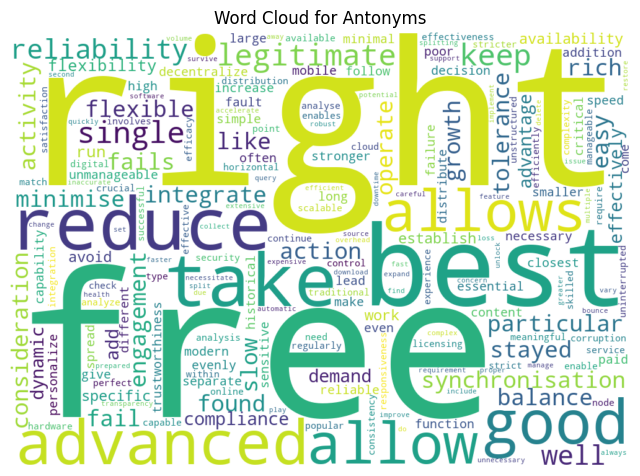

In [11]:
# Function to get antonyms for a word using WordNet
def get_antonyms(word):
    antonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                antonyms.extend(lemma.antonyms()[0].name())
    return list(set(antonyms))  # Remove duplicates and return as a list

# Create a dictionary to store words and their antonyms
word_antonyms_dict = {}

# Generate antonyms for each word and add them to the dictionary
for word in words:
    antonyms = get_antonyms(word)
    if antonyms:
        word_antonyms_dict[word] = antonyms

# Count the number of antonyms for each word
word_antonyms_count = {word: len(antonyms) for word, antonyms in word_antonyms_dict.items()}

# Generate a word cloud for word frequencies
word_freq = Counter(words)
wordcloud = WordCloud(width=1000, height=700, background_color='white')
wordcloud.generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Antonyms')
plt.show()

- **Observation** - *The above code follows the follwing approach:* <br>
1. Using the Above imported file text Applying wordnet technique to get the antonyms.<br>
2. Declared the antonyms function and imported it with nltk and took lemma of each word<br>
3. Defines a function for antonyms retrieval from WordNet.<br>
4. Creates a dictionary to store word antonyms.<br>
5. Counts synonyms for each word and stores the count.<br>
6. Generates a word cloud based on word frequencies using the WordCloud library for the antonyms.<br>

>### Write a program to get antonyms from WordNetLemmatizer

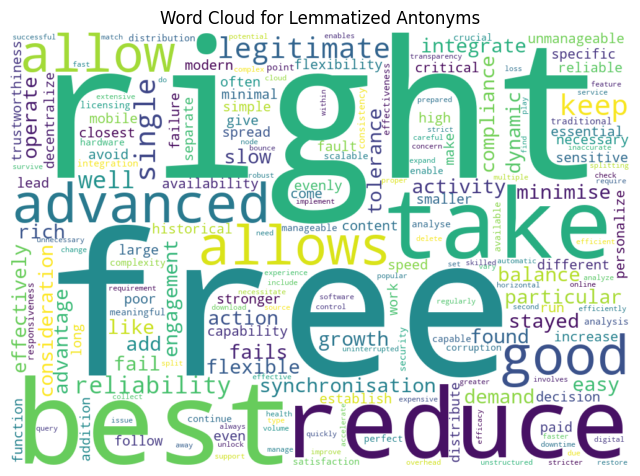

In [12]:
# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()
# Function to lemmatize a word using WordNetLemmatizer
def lemmatize_word(word):
    # Define a mapping of POS tags for WordNetLemmatizer (use WordNet POS constants)
    pos_mapping = {
        'n': wordnet.NOUN,
        'v': wordnet.VERB,
        'a': wordnet.ADJ,
        'r': wordnet.ADV
    }
    
    # Tokenize the word to identify its POS tag
    pos_tag = nltk.pos_tag([word])[0][1][0].lower()
    
    # Lemmatize the word using the appropriate POS tag
    lemma = lemmatizer.lemmatize(word, pos=pos_mapping.get(pos_tag, wordnet.NOUN))
    
    return lemma

# Lemmatize the words
lemmatized_words = [lemmatize_word(word) for word in words]
# Function to get antonyms for a word using WordNet
def get_antonyms(word):
    antonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            if lemma.antonyms():
                antonyms.append(lemma.antonyms()[0].name())
    return list(set(antonyms))  # Remove duplicates and return as a list

# Create a dictionary to store words and their antonyms
word_antonyms_dict = {}

# Generate antonyms for each word and add them to the dictionary
for word in lemmatized_words:
    antonyms = get_antonyms(word)
    if antonyms:
        word_antonyms_dict[word] = antonyms

# Count the number of antonyms for each word
word_antonyms_count = {word: len(antonyms) for word, antonyms in word_antonyms_dict.items()}

# Generate a word cloud for word frequencies
word_freq = Counter(words)
wordcloud = WordCloud(width=1000, height=700, background_color='white')
wordcloud.generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Lemmatized Antonyms')
plt.show()

# Create a bar chart for the number of antonyms per word
sorted_word_antonyms_count = dict(sorted(word_antonyms_count.items(), key=lambda x: x[1], reverse=True))
words, counts = zip(*sorted_word_antonyms_count.items())

- **Observation** - *The above code follows the follwing approach:* <br>

1. Applied the same technique of getting antonyms but with different approach.<br>
2. Creating a WordNetLemmatizer Object for a WordNetLemmatizer object named lemmatizer is created to perform lemmatization.<br>
3. The code defines a function lemmatize_word(word) to lemmatize a word using WordNetLemmatizer.<br>
4. It maps POS tags to WordNet's POS constants and tokenizes each word to identify its POS tag.<br>
5. Then, it lemmatizes the word using the appropriate POS tag and returns the lemma.<br>
6. The list lemmatized_words is created by lemmatizing each word in the original list of words.<br>

- **FINAL OBSERVATION** - *There is not much difference between the two approachs as in WORDNET I have considedered the corpus after just removing the stop words , whereas in WORDNET LEMMATIZAR we applied POS Tagging technique and took lemma of the words from the corpos to get synonyms & antonyms*